# Limb darkening speed tests

Here we reproduce the speed test figures in Agol & Luger (2018) for pure limb-darkened maps.

In [1]:
import starry
import numpy as np
import time
import matplotlib.pyplot as pl
%matplotlib inline

First, let's see how the run time scales with the number of data points for different degrees of limb darkening:

In [13]:
l = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
npts = np.array(np.logspace(2, 5, 7), dtype=int)
t = np.zeros((len(npts), len(l)))
for i, lmax in enumerate(l):
    map = starry.Map(lmax)
    map[:] = np.random.randn(lmax)
    for j, n in enumerate(npts):
        ro = 0.1
        xo = np.linspace(-1.2, 1.2, n)
        tstart = time.time()
        map.flux(xo=xo, ro=ro, gradient=True)
        t[j, i] = time.time() - tstart

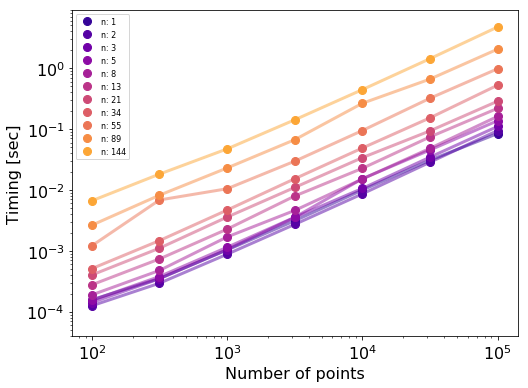

In [15]:
fig, ax = pl.subplots(1, figsize=(8, 6))
cmap = pl.get_cmap("plasma")
for ti, lmax, i in zip(t.transpose(), l, range(len(l))):
    ax.plot(npts, ti, 'o', color=cmap((i + 1) / (1.25 * len(l))), label="n: %s" % lmax, ms=8)
    ax.plot(npts, ti, '-', color=cmap((i + 1) / (1.25 * len(l))), alpha=0.5, lw=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=8)
ax.set_xlabel('Number of points', fontsize=16)
ax.set_ylabel('Timing [sec]', fontsize=16)
ax.set_ylim(4e-5, 9e0)
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

Next, let's look at the scaling with limb darkening degree for a fixed number of data points:

In [17]:
l = np.logspace(np.log10(1), np.log10(144), 20)
l = np.array(l, dtype=int)
l = np.array(list(sorted(set(l))))
t = np.zeros(len(l))
npts = 1000
ntimes = 100
ro = 0.1
xo = np.linspace(-1.2, 1.2, npts)
for i, lmax in enumerate(l):
    map = starry.Map(lmax)
    map[:] = np.random.randn(lmax)
    tstart = time.time()
    for j in range(ntimes):
        map.flux(xo=xo, ro=ro, gradient=True)
    t[i] = (time.time() - tstart) / ntimes

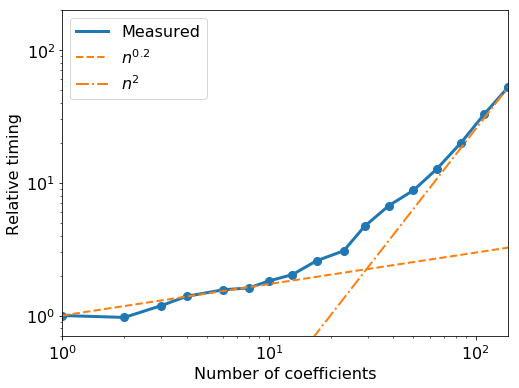

In [22]:
fig, ax = pl.subplots(1, figsize=(8, 6))
ax.plot(l, t / t[0], 'o', color='C0', ms=8)
ax.plot(l, t / t[0], '-', color='C0', lw=3, label='Measured')
ax.plot(l, l ** 0.237, '--', lw=2, color='C1', label=r'$n^{0.2}$')
ax.plot(l, t[-1] / t[0] * (l / l[-1]) ** 2, '-.', lw=2, color='C1', label=r'$n^2$')
ax.set_xlim(1, 144)
ax.set_ylim(0.7, 2e2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of coefficients', fontsize=16)
ax.set_ylabel('Relative timing', fontsize=16)
ax.legend(loc='upper left', fontsize=16)
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)